In [378]:
# Importación de librerías
# Manejo de data
import pandas as pd

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Escalado de variables
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Seleccion univariada usando Kbest
from sklearn.feature_selection import SelectKBest, f_regression

# Importancia de variables por Árbol de decisión 
from sklearn.tree import DecisionTreeRegressor

# Modelo de regresión lineal y random forest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# Para el calculo de errores
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np




# Preparación de datos

In [340]:
# Lectura del archivo CSV.

data = pd.read_csv('partidos_cebollitas.csv')
data.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [341]:
# Revisar informción
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha_partido           100 non-null    object
 1   equipo_local            100 non-null    object
 2   equipo_visitante        100 non-null    object
 3   goles_local             100 non-null    int64 
 4   goles_visitante         100 non-null    int64 
 5   posesion_local (%)      100 non-null    int64 
 6   posesion_visitante (%)  100 non-null    int64 
 7   tiros_arco_local        100 non-null    int64 
 8   tiros_arco_visitante    100 non-null    int64 
 9   estadio                 100 non-null    object
dtypes: int64(6), object(4)
memory usage: 7.9+ KB


In [342]:
# Tratamiento de datos atípicos o faltantes
print(f"Datos nulos:\n{data.isnull().sum()}") # Print para revisar datos nulos en el data set

# No hay datos nulos pero si los hubiese podríamos inputar esos faltantes con el promedio, por ejemplo en datos de goles_local
# data['goles_local'] = data['goles_local'].fillna(data['goles_local'].mean())


Datos nulos:
fecha_partido             0
equipo_local              0
equipo_visitante          0
goles_local               0
goles_visitante           0
posesion_local (%)        0
posesion_visitante (%)    0
tiros_arco_local          0
tiros_arco_visitante      0
estadio                   0
dtype: int64


In [343]:
# One-hot encoding para equipos, se usa para transformar variables categóricas en variables binarias
datos_preparados = pd.get_dummies(data, columns = ['equipo_local', 'equipo_visitante'])
datos_preparados.head()

,fecha_partido,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,equipo_local_Atlético Python,equipo_local_Cebollitas FC,equipo_local_Data United,equipo_local_NumPy City,equipo_local_Real Pandas,equipo_visitante_Atlético Python,equipo_visitante_Cebollitas FC,equipo_visitante_Data United,equipo_visitante_NumPy City,equipo_visitante_Real Pandas
0,2023-01-01,2,0,54,46,12,6,Python Arena,True,False,False,False,False,False,True,False,False,False
1,2023-01-08,1,5,60,40,12,3,Estadio ML,False,False,False,True,False,True,False,False,False,False
2,2023-01-15,1,0,55,45,10,7,Python Arena,False,True,False,False,False,False,False,True,False,False
3,2023-01-22,2,3,57,43,3,3,Campo Pandas,True,False,False,False,False,False,False,True,False,False
4,2023-01-29,5,3,52,48,7,12,Estadio ML,False,False,True,False,False,False,True,False,False,False


In [344]:
# Buscamos duplicados, por curiosidad, podríamos usar drop_duplicates desde un inicio y no falla nada
print(f"Total de filas del dataframe: {len(datos_preparados)}\nFilas duplicadas: {datos_preparados.duplicated().sum()}")

# Eliminamos duplicados (en caso de que los hubiera)
datos_preparados.drop_duplicates(inplace = True)
print(f"Total de filas del dataframe: {len(datos_preparados)}")

Total de filas del dataframe: 100
Filas duplicadas: 0
Total de filas del dataframe: 100


In [345]:
# Manejar fechas

# Fechas inválidas 
print(f"Fechas inválidas:\n{datos_preparados['fecha_partido'].isnull().sum()}") 

datos_preparados['fecha_partido'] = pd.to_datetime(datos_preparados['fecha_partido'], errors = 'coerce')
print(f"Fechas inválidas después de la limpieza:\n{datos_preparados['fecha_partido'].isnull().sum()}") 

Fechas inválidas:
0
Fechas inválidas después de la limpieza:
0


In [346]:
datos_preparados.info()
datos_preparados.head()
print(f"\nShape final del dataset: {datos_preparados.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   fecha_partido                     100 non-null    datetime64[ns]
 1   goles_local                       100 non-null    int64         
 2   goles_visitante                   100 non-null    int64         
 3   posesion_local (%)                100 non-null    int64         
 4   posesion_visitante (%)            100 non-null    int64         
 5   tiros_arco_local                  100 non-null    int64         
 6   tiros_arco_visitante              100 non-null    int64         
 7   estadio                           100 non-null    object        
 8   equipo_local_Atlético Python      100 non-null    bool          
 9   equipo_local_Cebollitas FC        100 non-null    bool          
 10  equipo_local_Data United          100 non-null    b

# Exploración de datos

*Solo queremos evaluar información de Cebollitas FC, por lo que dejaremos úncamente los partidos donde Cebollitas FC jugó*

In [347]:
# DataFrame de partidos de CebollitasFC como local y como visitante

datos_cebollitas = datos_preparados[(datos_preparados['equipo_local_Cebollitas FC'] == True) | (datos_preparados['equipo_visitante_Cebollitas FC'] == True)].copy()
datos_cebollitas.head()


,fecha_partido,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,equipo_local_Atlético Python,equipo_local_Cebollitas FC,equipo_local_Data United,equipo_local_NumPy City,equipo_local_Real Pandas,equipo_visitante_Atlético Python,equipo_visitante_Cebollitas FC,equipo_visitante_Data United,equipo_visitante_NumPy City,equipo_visitante_Real Pandas
0,2023-01-01,2,0,54,46,12,6,Python Arena,True,False,False,False,False,False,True,False,False,False
2,2023-01-15,1,0,55,45,10,7,Python Arena,False,True,False,False,False,False,False,True,False,False
4,2023-01-29,5,3,52,48,7,12,Estadio ML,False,False,True,False,False,False,True,False,False,False
5,2023-02-05,3,3,60,40,8,11,Python Arena,False,False,True,False,False,False,True,False,False,False
7,2023-02-19,1,2,56,44,5,5,Estadio ML,False,True,False,False,False,False,False,False,False,True


In [348]:
datos_cebollitas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   fecha_partido                     44 non-null     datetime64[ns]
 1   goles_local                       44 non-null     int64         
 2   goles_visitante                   44 non-null     int64         
 3   posesion_local (%)                44 non-null     int64         
 4   posesion_visitante (%)            44 non-null     int64         
 5   tiros_arco_local                  44 non-null     int64         
 6   tiros_arco_visitante              44 non-null     int64         
 7   estadio                           44 non-null     object        
 8   equipo_local_Atlético Python      44 non-null     bool          
 9   equipo_local_Cebollitas FC        44 non-null     bool          
 10  equipo_local_Data United          44 non-null     bool   

In [349]:
# Estadísticas descriptivas
datos_cebollitas.describe()

,fecha_partido,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante
count,44,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,2023-12-23 16:21:49.090909184,2.590909,2.227273,50.931818,49.068182,7.454545,7.931818
min,2023-01-01 00:00:00,0.000000,0.000000,41.000000,40.000000,3.000000,4.000000
25%,2023-07-14 06:00:00,1.000000,1.000000,46.000000,44.750000,5.000000,5.000000
50%,2023-12-24 00:00:00,3.000000,2.000000,52.000000,48.000000,7.000000,7.500000
75%,2024-07-15 18:00:00,4.000000,3.000000,55.250000,54.000000,10.000000,11.000000
max,2024-11-24 00:00:00,5.000000,5.000000,60.000000,59.000000,12.000000,12.000000
std,NaN,1.646959,1.568048,5.707595,5.707595,2.807420,2.872465


In [350]:
# Promedio goles cebolitas como local y como visitante

cebollitas_goles_local = datos_cebollitas[datos_cebollitas['equipo_local_Cebollitas FC']==True]['goles_local'].mean()
cebollitas_goles_visitante = datos_cebollitas[datos_cebollitas['equipo_visitante_Cebollitas FC']==True]['goles_visitante'].mean()

print(f"Goles promedio de Cebollitas FC como local: {cebollitas_goles_local}")
print(f"Goles pomedio de Cebollitas FC como visitante: {cebollitas_goles_visitante}")

Goles promedio de Cebollitas FC como local: 2.230769230769231
Goles pomedio de Cebollitas FC como visitante: 2.611111111111111


In [351]:
dataFrameModelo = datos_cebollitas[['goles_local','goles_visitante','posesion_local (%)','posesion_visitante (%)','tiros_arco_local','tiros_arco_visitante','equipo_local_Cebollitas FC','equipo_visitante_Cebollitas FC']].copy()
dataFrameModelo['juega_local'] = datos_cebollitas['equipo_local_Cebollitas FC'].astype(int)
dataFrameModelo['juega_visitante'] = datos_cebollitas['equipo_visitante_Cebollitas FC'].astype(int)
dataFrameModelo.head()

,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,equipo_local_Cebollitas FC,equipo_visitante_Cebollitas FC,juega_local,juega_visitante
0,2,0,54,46,12,6,False,True,0,1
2,1,0,55,45,10,7,True,False,1,0
4,5,3,52,48,7,12,False,True,0,1
5,3,3,60,40,8,11,False,True,0,1
7,1,2,56,44,5,5,True,False,1,0


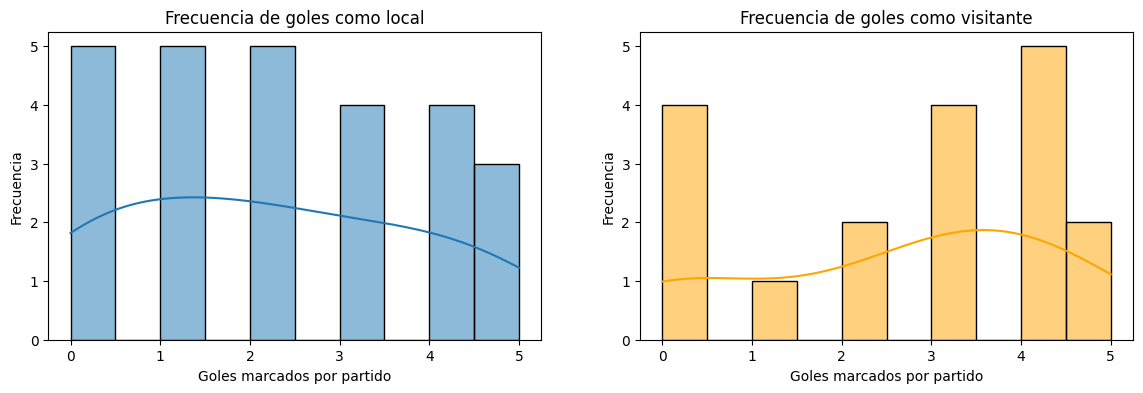

In [352]:
# Histogramas de goles como equipo local y visitante
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.histplot(dataFrameModelo[dataFrameModelo['equipo_local_Cebollitas FC']==True]['goles_local'], kde=True, ax=ax[0], bins=10)
ax[0].set_title('Frecuencia de goles como local')
ax[0].set_ylabel('Frecuencia')
ax[0].set_xlabel('Goles marcados por partido')

sns.histplot(dataFrameModelo[dataFrameModelo['equipo_visitante_Cebollitas FC']==True]['goles_visitante'], kde=True, ax=ax[1], bins=10, color='orange')
ax[1].set_title('Frecuencia de goles como visitante')
ax[1].set_ylabel('Frecuencia')
ax[1].set_xlabel('Goles marcados por partido')
plt.show()

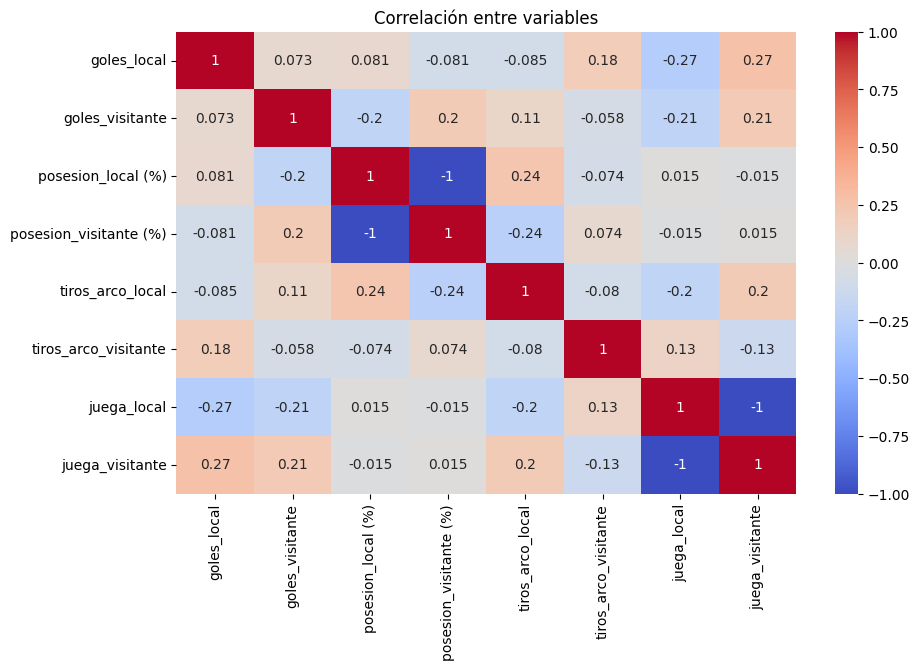

In [353]:
# Heatmap de correlaciones
plt.figure(figsize=(10,6))
sns.heatmap( dataFrameModelo[['goles_local','goles_visitante','posesion_local (%)','posesion_visitante (%)','tiros_arco_local','tiros_arco_visitante','juega_local','juega_visitante']].corr(),
            annot=True,
            cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()


## Escalado de datos

In [354]:
# Normalización
scaler_norm = MinMaxScaler()

dataFrameModelo['tiros_arco_local_normalizado'] = scaler_norm.fit_transform(dataFrameModelo[['tiros_arco_local']])
dataFrameModelo['tiros_arco_visitante_normalizado'] = scaler_norm.fit_transform(dataFrameModelo[['tiros_arco_visitante']])

# Ver resultados
dataFrameModelo[['tiros_arco_local','tiros_arco_local_normalizado']].head()

,tiros_arco_local,tiros_arco_local_normalizado
0,12,1.000000
2,10,0.777778
4,7,0.444444
5,8,0.555556
7,5,0.222222


In [355]:
# Estandarización 
scaler_estandar = StandardScaler()

dataFrameModelo['posesion_local (%)_escalado'] = scaler_estandar.fit_transform(dataFrameModelo[['posesion_local (%)']])
dataFrameModelo['posesion_visitante (%)_escalado'] = scaler_estandar.fit_transform(dataFrameModelo[['posesion_visitante (%)']])

dataFrameModelo[['posesion_visitante (%)', 'posesion_visitante (%)_escalado']].head()

,posesion_visitante (%),posesion_visitante (%)_escalado
0,46,-0.543776
2,45,-0.721007
4,48,-0.189315
5,40,-1.607160
7,44,-0.898237


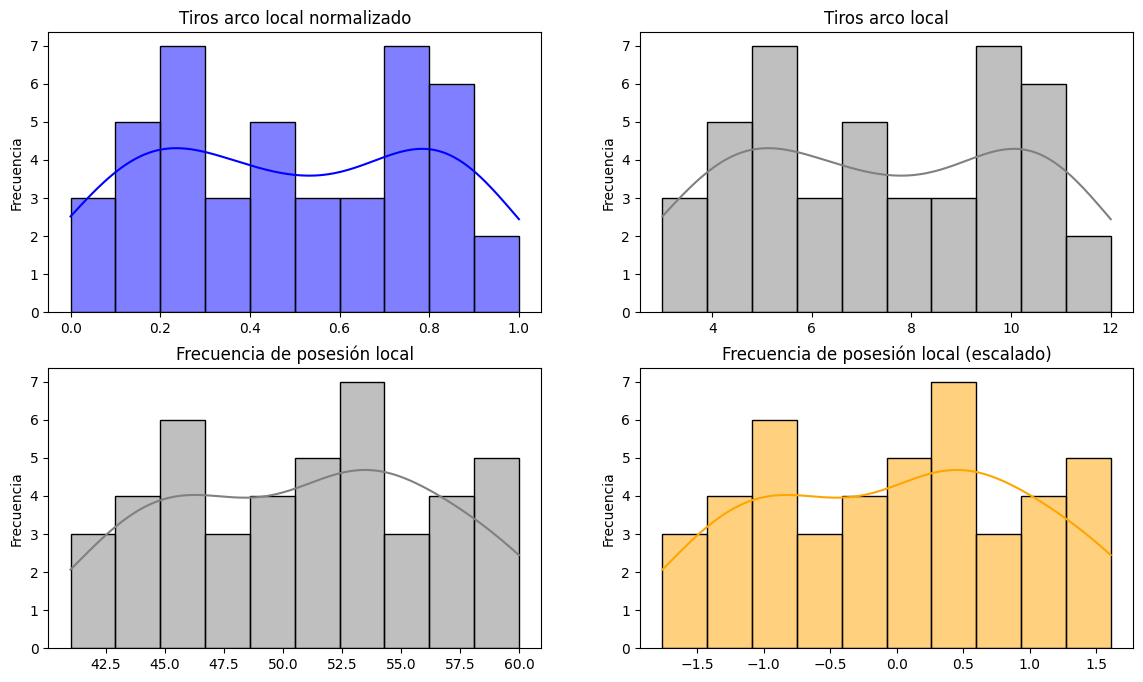

In [356]:
# Histogramas de goles como equipo local y visitante
fig, ax = plt.subplots(2,2, figsize=(14,8))
sns.histplot(dataFrameModelo['tiros_arco_local_normalizado'], kde=True, ax=ax[0,0], bins=10, color = 'blue')
ax[0,0].set_title('Tiros arco local normalizado')
ax[0,0].set_ylabel('Frecuencia')
ax[0,0].set_xlabel('')

sns.histplot(dataFrameModelo['tiros_arco_local'], kde=True, ax=ax[0,1], bins=10, color='grey')
ax[0,1].set_title('Tiros arco local')
ax[0,1].set_ylabel('Frecuencia')
ax[0,1].set_xlabel('')

sns.histplot(dataFrameModelo['posesion_local (%)_escalado'], kde=True, ax=ax[1,1], bins=10, color='orange')
ax[1,1].set_title('Frecuencia de posesión local (escalado)')
ax[1,1].set_ylabel('Frecuencia')
ax[1,1].set_xlabel('')

sns.histplot(dataFrameModelo['posesion_local (%)'], kde=True, ax=ax[1,0], bins=10, color='grey')
ax[1,0].set_title('Frecuencia de posesión local')
ax[1,0].set_ylabel('Frecuencia')
ax[1,0].set_xlabel('')
plt.show()

## Ingeniería de características

In [357]:
# Creando variables

# Diferencia de goles
dataFrameModelo['diferencia_goles'] = dataFrameModelo['goles_local']-dataFrameModelo['goles_visitante']

# Tasa goles/posesion_local
dataFrameModelo['rate_goles/posesion_local'] = dataFrameModelo['goles_local']/dataFrameModelo['posesion_local (%)']

# Tasa goles/posesion_visitante
dataFrameModelo['rate_goles/posesion_visitante'] = dataFrameModelo['goles_visitante']/dataFrameModelo['posesion_visitante (%)']

# Partido ganado por Cebollitas
condicion = (
    ((dataFrameModelo['diferencia_goles']>0) & (dataFrameModelo['juega_local'] == 1))
    | 
    ((dataFrameModelo['diferencia_goles']>0) & (dataFrameModelo['juega_visitante'] == 1))
)
dataFrameModelo.loc[condicion,'GanaCebollitas']= 1
dataFrameModelo['GanaCebollitas'].fillna(0, inplace=True)
dataFrameModelo['GanaCebollitas'].astype(int)


# viendo el Data Frame 
dataFrameModelo.info()


<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   goles_local                       44 non-null     int64  
 1   goles_visitante                   44 non-null     int64  
 2   posesion_local (%)                44 non-null     int64  
 3   posesion_visitante (%)            44 non-null     int64  
 4   tiros_arco_local                  44 non-null     int64  
 5   tiros_arco_visitante              44 non-null     int64  
 6   equipo_local_Cebollitas FC        44 non-null     bool   
 7   equipo_visitante_Cebollitas FC    44 non-null     bool   
 8   juega_local                       44 non-null     int32  
 9   juega_visitante                   44 non-null     int32  
 10  tiros_arco_local_normalizado      44 non-null     float64
 11  tiros_arco_visitante_normalizado  44 non-null     float64
 12  posesion_local 

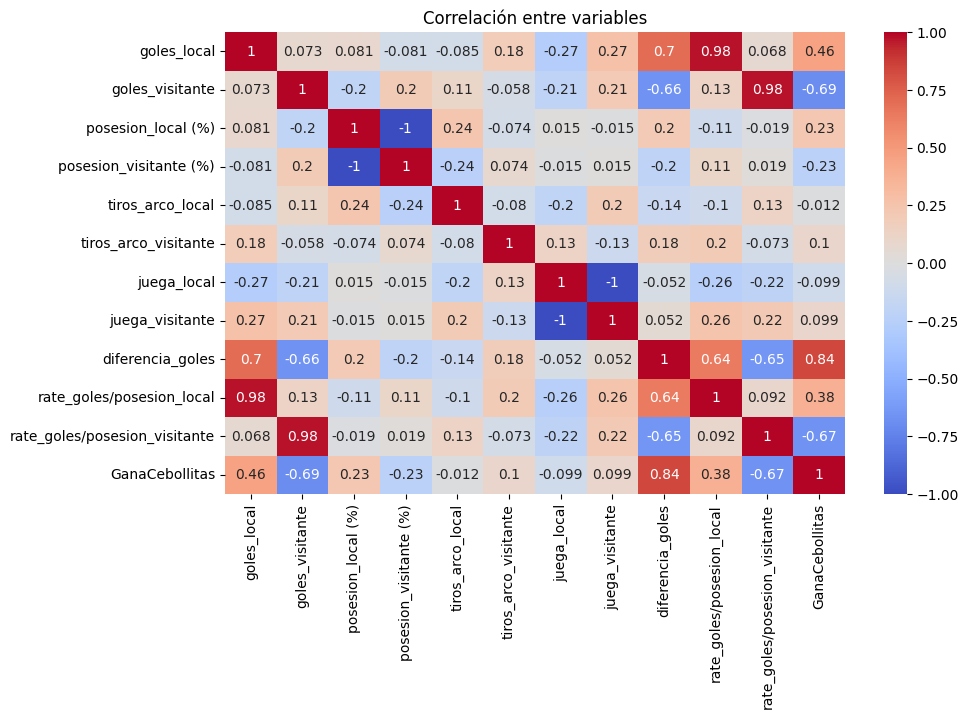

In [358]:
# Heatmap de correlaciones
dataCebollitas = dataFrameModelo[['goles_local','goles_visitante','posesion_local (%)','posesion_visitante (%)','tiros_arco_local','tiros_arco_visitante','juega_local','juega_visitante','diferencia_goles','rate_goles/posesion_local','rate_goles/posesion_visitante','GanaCebollitas']].copy()
plt.figure(figsize=(10,6))
sns.heatmap( dataCebollitas[['goles_local','goles_visitante','posesion_local (%)','posesion_visitante (%)','tiros_arco_local','tiros_arco_visitante','juega_local','juega_visitante','diferencia_goles','rate_goles/posesion_local','rate_goles/posesion_visitante','GanaCebollitas']].corr(),
            annot=True,
            cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()


In [359]:
# Buscamos que no haya nulos o variables extrañas
dataCebollitas.info()
dataCebollitas.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   goles_local                    44 non-null     int64  
 1   goles_visitante                44 non-null     int64  
 2   posesion_local (%)             44 non-null     int64  
 3   posesion_visitante (%)         44 non-null     int64  
 4   tiros_arco_local               44 non-null     int64  
 5   tiros_arco_visitante           44 non-null     int64  
 6   juega_local                    44 non-null     int32  
 7   juega_visitante                44 non-null     int32  
 8   diferencia_goles               44 non-null     int64  
 9   rate_goles/posesion_local      44 non-null     float64
 10  rate_goles/posesion_visitante  44 non-null     float64
 11  GanaCebollitas                 44 non-null     float64
dtypes: float64(3), int32(2), int64(7)
memory usage: 4.1 KB


,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,juega_local,juega_visitante,diferencia_goles,rate_goles/posesion_local,rate_goles/posesion_visitante,GanaCebollitas
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,2.590909,2.227273,50.931818,49.068182,7.454545,7.931818,0.590909,0.409091,0.363636,0.051258,0.045323,0.386364
std,1.646959,1.568048,5.707595,5.707595,2.807420,2.872465,0.497350,0.497350,2.189732,0.033572,0.031228,0.492545
min,0.000000,0.000000,41.000000,40.000000,3.000000,4.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,46.000000,44.750000,5.000000,5.000000,0.000000,0.000000,-1.000000,0.021112,0.018781,0.000000
50%,3.000000,2.000000,52.000000,48.000000,7.000000,7.500000,1.000000,0.000000,0.000000,0.050000,0.045983,0.000000
75%,4.000000,3.000000,55.250000,54.000000,10.000000,11.000000,1.000000,1.000000,2.000000,0.078824,0.070489,1.000000
max,5.000000,5.000000,60.000000,59.000000,12.000000,12.000000,1.000000,1.000000,5.000000,0.119048,0.102041,1.000000


## Seleccionando las características más relevantes

In [360]:
# Seleccion univariada usando Kbest

# Variables predictoras y objetivo
x = dataCebollitas[['goles_local','goles_visitante','posesion_local (%)','posesion_visitante (%)','tiros_arco_local','tiros_arco_visitante','juega_local','juega_visitante','diferencia_goles','rate_goles/posesion_local','rate_goles/posesion_visitante']]
y = dataCebollitas['GanaCebollitas']

# Seleccionar 2 mejores variables
selector = SelectKBest(score_func=f_regression, k=2)
selector.fit(x,y)

# Resultados orenados por relevancia
scores = selector.scores_
variables = x.columns

resultados = pd.DataFrame({'Variable':variables, 'Score': scores}).sort_values(by='Score', ascending=False)
resultados



,Variable,Score
8,diferencia_goles,98.272907
1,goles_visitante,37.842148
10,rate_goles/posesion_visitante,33.526213
0,goles_local,11.111201
9,rate_goles/posesion_local,7.133872
3,posesion_visitante (%),2.409802
2,posesion_local (%),2.409802
5,tiros_arco_visitante,0.434929
7,juega_visitante,0.417836
6,juega_local,0.417836


Podemos ver que hay variables con el mismo score, o score muy bajo ¿Qué podemos hacer en ese caso? 

❌ E L I M I N A R L A S

✅ No tomarlas en cuenta

## Modelado

In [361]:
# División de los datos
X = dataCebollitas[['goles_local','goles_visitante',
                    'posesion_local (%)','posesion_visitante (%)',
                    'diferencia_goles','rate_goles/posesion_local',
                    'rate_goles/posesion_visitante']
                    ]
y = dataCebollitas['GanaCebollitas']

X_train, x_test, Y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [362]:
# Instanciar y entrenar modelo
modelo_RL = LinearRegression()    # Definimos el modelo
modelo_RL.fit(X_train,Y_train)    # Ajustamos el modelo a los datos de entrenamiento

print("Modelo ajustado correctamente")

Modelo ajustado correctamente


In [363]:
# Mostrar coeficientes
print(f"Intercepto (B0): {modelo_RL.intercept_}")
print(f"Coeficiente (B): {modelo_RL.coef_}")

for idx, col_name in enumerate(X.columns):
    print(f"Si aumentamos 1 unidad en '{col_name}', La diferencia de goles: {modelo_RL.coef_[idx]:.2f}")

Intercepto (B0): 0.43603219482212163
Coeficiente (B): [ 2.63887316e-01  8.75725446e-02 -1.63024549e-03  1.63024549e-03
  1.76314771e-01 -1.43176031e+01 -5.45946998e+00]
Si aumentamos 1 unidad en 'goles_local', La diferencia de goles: 0.26
Si aumentamos 1 unidad en 'goles_visitante', La diferencia de goles: 0.09
Si aumentamos 1 unidad en 'posesion_local (%)', La diferencia de goles: -0.00
Si aumentamos 1 unidad en 'posesion_visitante (%)', La diferencia de goles: 0.00
Si aumentamos 1 unidad en 'diferencia_goles', La diferencia de goles: 0.18
Si aumentamos 1 unidad en 'rate_goles/posesion_local', La diferencia de goles: -14.32
Si aumentamos 1 unidad en 'rate_goles/posesion_visitante', La diferencia de goles: -5.46


In [364]:
# Hacer predicciones
y_pred = modelo_RL.predict(x_test)

# Comparar predicciones vs valores reales
df_resultados = x_test.copy()
df_resultados['Gana cebollitas'] = y_test
df_resultados['Se predice que gana Cebollitas'] = y_pred.round(2)

# 10 primero resultados del data frame
df_resultados.head(10)

,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),diferencia_goles,rate_goles/posesion_local,rate_goles/posesion_visitante,Gana cebollitas,Se predice que gana Cebollitas
89,4,4,41,59,0,0.097561,0.067797,0.0,0.10
55,4,5,51,49,-1,0.078431,0.102041,0.0,0.07
58,5,5,42,58,0,0.119048,0.086207,0.0,0.04
88,0,2,54,46,-2,0.000000,0.043478,0.0,0.01
83,3,0,47,53,3,0.063830,0.000000,1.0,0.85
94,3,3,46,54,0,0.065217,0.055556,0.0,0.27
7,1,2,56,44,-1,0.017857,0.045455,0.0,0.18
29,2,1,46,54,1,0.043478,0.018519,1.0,0.52
21,3,3,53,47,0,0.056604,0.063830,0.0,0.32


<function matplotlib.pyplot.show(close=None, block=None)>

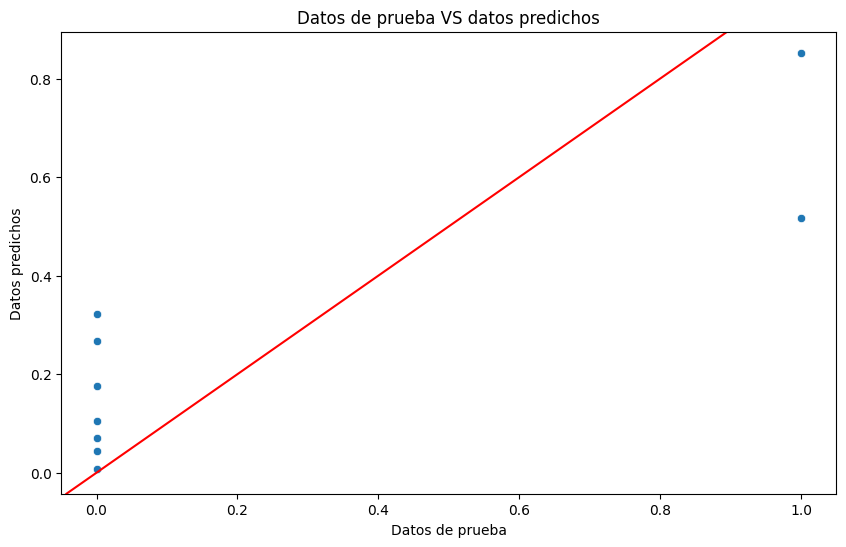

In [365]:
# Grafico de dispersión para ver la correlación
plt.figure(figsize = (10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Datos de prueba VS datos predichos')
plt.xlabel('Datos de prueba')
plt.ylabel('Datos predichos')
plt.axline((0,0), slope = 1, color='red', linestyle= '-') #Linea ideal
plt.show

In [366]:
# Calcular metricas
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f} ")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (r2): {r2:.2f}")

Error cuadrático medio (MSE): 0.05 
Raíz del error cuadrático medio (RMSE): 0.23
Error absoluto medio (MAE): 0.18
Coeficiente de determinación (r2): 0.69


In [367]:
if r2 < 0:
    print("❌ El modelo no explica la varianza. Peor que adivinar.")
elif r2 < 0.3:
    print("❌ El modelo explica muy poco. Posible overtfiting. ")
else:
    print("✅ El modelo tiene un poder explicativo aceptable.")

✅ El modelo tiene un poder explicativo aceptable.


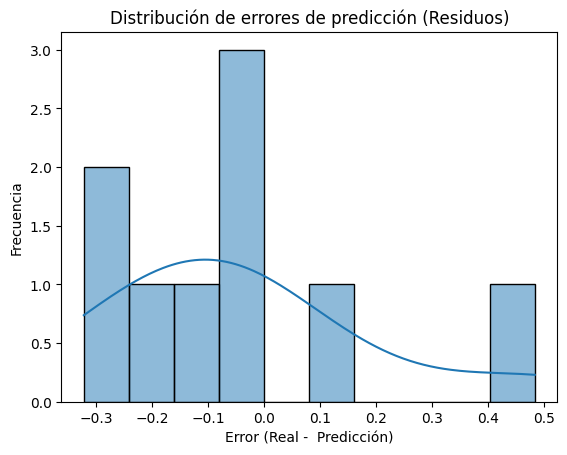

In [368]:
sns.histplot(y_test - y_pred, bins = 10, kde = True)
plt.title('Distribución de errores de predicción (Residuos)')
plt.xlabel('Error (Real -  Predicción)')
plt.ylabel('Frecuencia')
plt.show()

## Cambiando el modelo por RANDOM FOREST

In [379]:
# Instanciar y entrenar modelo
modelo_RF = RandomForestRegressor()    # Definimos el modelo
modelo_RF.fit(X_train,Y_train)    # Ajustamos el modelo a los datos de entrenamiento

print("Modelo ajustado correctamente")

Modelo ajustado correctamente


In [380]:
# Hacer predicciones
y_pred = modelo_RF.predict(x_test)

# Comparar predicciones vs valores reales
df_resultados = x_test.copy()
df_resultados['Gana cebollitas'] = y_test
df_resultados['Se predice que gana Cebollitas'] = y_pred.round(2)

# 10 primero resultados del data frame
df_resultados.head(10)

,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),diferencia_goles,rate_goles/posesion_local,rate_goles/posesion_visitante,Gana cebollitas,Se predice que gana Cebollitas
89,4,4,41,59,0,0.097561,0.067797,0.0,0.00
55,4,5,51,49,-1,0.078431,0.102041,0.0,0.00
58,5,5,42,58,0,0.119048,0.086207,0.0,0.00
88,0,2,54,46,-2,0.000000,0.043478,0.0,0.00
83,3,0,47,53,3,0.063830,0.000000,1.0,1.00
94,3,3,46,54,0,0.065217,0.055556,0.0,0.00
7,1,2,56,44,-1,0.017857,0.045455,0.0,0.00
29,2,1,46,54,1,0.043478,0.018519,1.0,0.88
21,3,3,53,47,0,0.056604,0.063830,0.0,0.00


<function matplotlib.pyplot.show(close=None, block=None)>

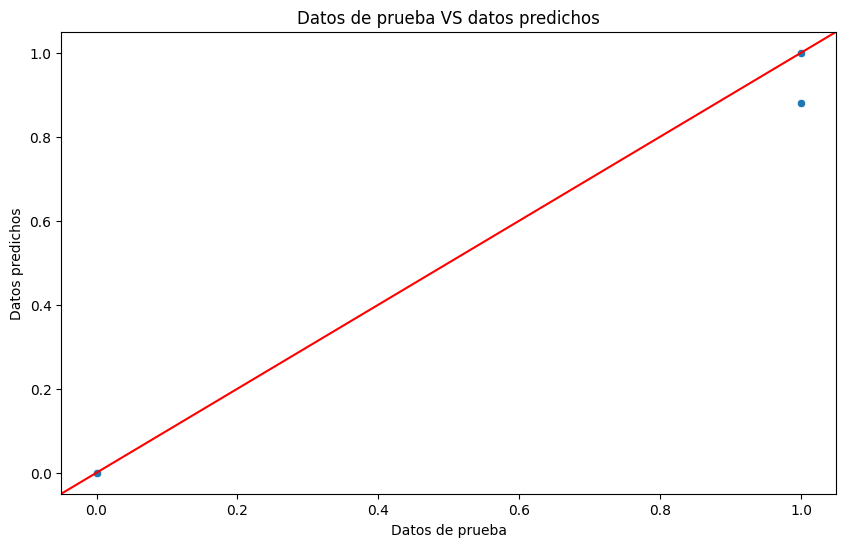

In [381]:
# Grafico de dispersión para ver la correlación
plt.figure(figsize = (10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Datos de prueba VS datos predichos')
plt.xlabel('Datos de prueba')
plt.ylabel('Datos predichos')
plt.axline((0,0), slope = 1, color='red', linestyle= '-') #Linea ideal
plt.show

In [382]:
# Calcular metricas
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f} ")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (r2): {r2:.2f}")

Error cuadrático medio (MSE): 0.00 
Raíz del error cuadrático medio (RMSE): 0.04
Error absoluto medio (MAE): 0.01
Coeficiente de determinación (r2): 0.99


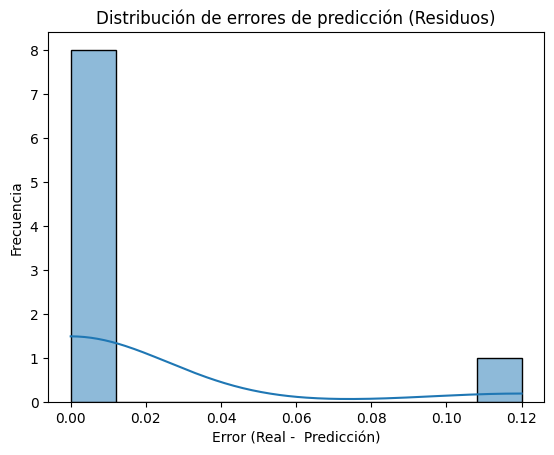

In [383]:
sns.histplot(y_test - y_pred, bins = 10, kde = True)
plt.title('Distribución de errores de predicción (Residuos)')
plt.xlabel('Error (Real -  Predicción)')
plt.ylabel('Frecuencia')
plt.show()